# Analysing Stock prices of these companies(Apple,Amazon,Google,Microsoft) are correlated or not 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 

C:\Users\my lappy\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
apple=pd.read_csv("AAPL_data.csv")

In [3]:
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [8]:
amzn=pd.read_csv("AMZN_data.csv")

In [9]:
amzn.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [10]:
google=pd.read_csv("GOOG_data.csv")

In [11]:
google.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [12]:
micrsft=pd.read_csv("MSFT_data.csv")

In [13]:
micrsft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [19]:
close=pd.DataFrame()


close['apple']=apple['close']
close['amzn']=amzn['close']
close['google']=google['close']
close['micrsft']=micrsft['close']

In [20]:
close.head()

,apple,amzn,google,micrsft
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04


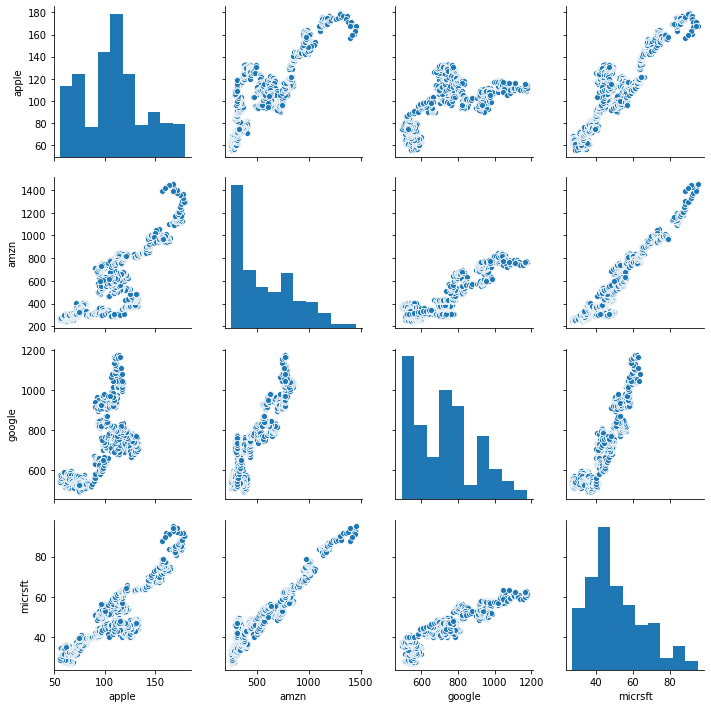

In [22]:
sb.pairplot(data=close)

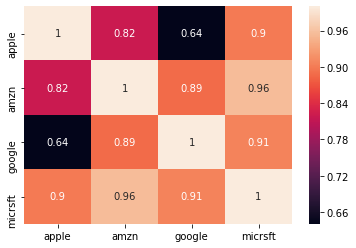

In [24]:
sb.heatmap(close.corr(),annot=True)

# Analyize daily return of each Stoch and correlation between them

In [26]:
data=pd.DataFrame()

In [35]:
data['apple_chng']=((apple['close']-apple['open'])/apple['close'])*100
data['amzn_chng']=((amzn['close']-amzn['open'])/amzn['close'])*100
data['google_chng']=((google['close']-google['open'])/google['close'])*100
data['micrsft_chng']=((micrsft['close']-micrsft['open'])/micrsft['close'])*100

In [36]:
data.head()

,apple_chng,amzn_chng,google_chng,micrsft_chng
0,0.206325,0.209964,-1.708269,0.725953
1,0.714688,-2.328836,-0.216075,0.753769
2,-2.481344,-0.189409,-1.781065,0.000000
3,-0.042869,2.946525,1.489879,0.356761
4,0.443624,0.694548,0.334039,0.427960


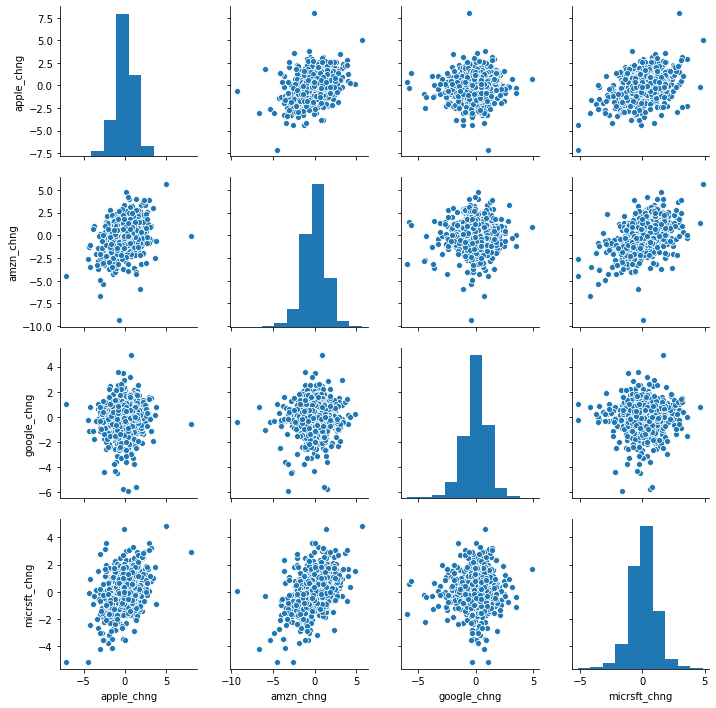

In [37]:
sb.pairplot(data=data)

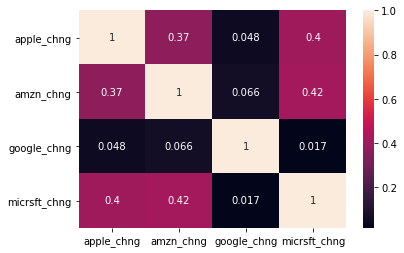

In [39]:
sb.heatmap(data.corr(),annot=True)

# Risk Analysis(value) for different Tech companies

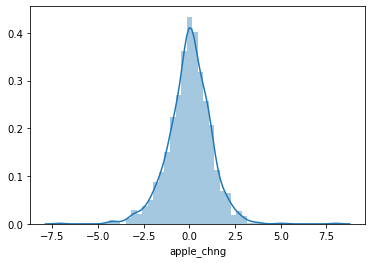

In [41]:
sb.distplot(data['apple_chng'])

In [42]:
data['apple_chng'].std()

## 68% of entire data 

1.1871377131421237

In [43]:
data['apple_chng'].std()*2

## 95% of entire data

2.3742754262842474

In [44]:
data['apple_chng'].std()*3

## 99.7% of entire data

3.561413139426371

In [45]:
data['apple_chng'].quantile(0.1)

-1.4246644227944307

In [46]:
data.describe().T    ## Transpose

,count,mean,std,min,25%,50%,75%,max
apple_chng,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
amzn_chng,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
google_chng,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
micrsft_chng,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
